## Bike Sharing

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Step 1: Import Libraries

In [182]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Import numpy and pandas to read the dataset
import numpy as np
import pandas as pd

#Import libraries for plots
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

#Import sklearn libraries for splitting dataset, Linear Regression & scaling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

#Import statsmodel libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor # For VIF
#

## Step 2: Define Procedure/Function

In [183]:
# Fucntion for Univariet Analysis
def univariate(df,col):
    sns.set(style="darkgrid")
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,3))
    ax[0].set_title("Distribution Plot")
    sns.distplot(df[col],ax=ax[0])
    ax[1].set_title("Box Plot")
    sns.boxplot(data=df,x=col,ax=ax[1])
    plt.show()
    
# Function to create plots for Categorical Variable
#def categorical_plot(col,x,y):
#    plt.figure(figsize = (x,y))
#    plt.subplot(1,2,1)
#    sns.barplot(col,'cns',data=bike)
#    return
    
# Function to calculate VIF
def calculateVIF (X_train_new):
    vif = pd.DataFrame()
    X = X_train_new
    vif['Features'] = X.columns
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cns',data=bikes)
    return vif
    
# Function to getStats Model
def getStatsModel(X_train_rfe,ytrain):
    X_train_rfe = sm.add_constant(X_train_rfe)
    lm = sm.OLS(ytrain,X_train_rfe).fit()
    return lm


# Function to getStats Model Summary
def getStatsModelSummary(X_train_rfe,ytrain):
    lm = getsStatModel(X_train_rfe,ytrain)
    return lm.summary()

## Step 3: Reading and Understanding the Data

In [184]:
# Read file
bike = pd.read_csv("day.csv")

In [185]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [187]:
# Checking shape of dataset 
bike.shape

(730, 16)

In [188]:
# To check the datatype of each column in dataset.
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Observation from above info:
- Except dteday (Date Type), all are either. interger or float type. 
- There ae some fileds which are categorical in nature but have interger/float type. We     
  will see whther we need to keep as it is or need to convert into Categorical column.
- Numerical Variable:yr,mnth,holiday,weekday,workingday
- Float Variable: temp,atemp,hum,windspeed
- Numerical Varaiable may need to convert into Categorical Variable:
  season,mnth,weathersit

In [189]:
# To find the statistics of datset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [190]:
# Check Null Values
pd.isnull(bike).sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Observation:-
 - There is no missing or Null Values. No Imputation Required.

In [191]:
# To find the Unique values of Categorical field
print ("Season    : ", bike['season'].unique())
print ("Weathersit: ", bike['weathersit'].unique())
print ("yr        : ", bike['yr'].unique())
print ("mnth      : " ,bike['mnth'].unique())
print ("holiday   : ", bike['holiday'].unique())
print ("weekday   : ", bike['weekday'].unique())
print ("workingday: ", bike['workingday'].unique())

Season    :  [1 2 3 4]
Weathersit:  [2 1 3]
yr        :  [0 1]
mnth      :  [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday   :  [0 1]
weekday   :  [6 0 1 2 3 4 5]
workingday:  [0 1]


### Observation:-
 - season possible values     -> 1,2,3,4
 - weathersit possible values -> 1,2,3
 - mnth possible values       -> 1,2,3,4,......,12
 - season, wetherlist, yr, mnth, holiday,weekday & Working day are numerical but descrete
   variable which may need to change further into categorical dummy variable by using
   one hard coding.

## Step 2: Exploratory Data Analysis (Visualization of Data)

- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association  
  with the outcome variable
- Visualise data using `matplotlib` and `seaborn`.
- Check thr Outliars in Numeric features.
- Numerical Variable:yr,mnth,holiday,weekday,workingday
- Float Variable: temp,atemp,hum,windspeed

## 2(a): Visualising all Variables through pairplot and see possible values of each variable

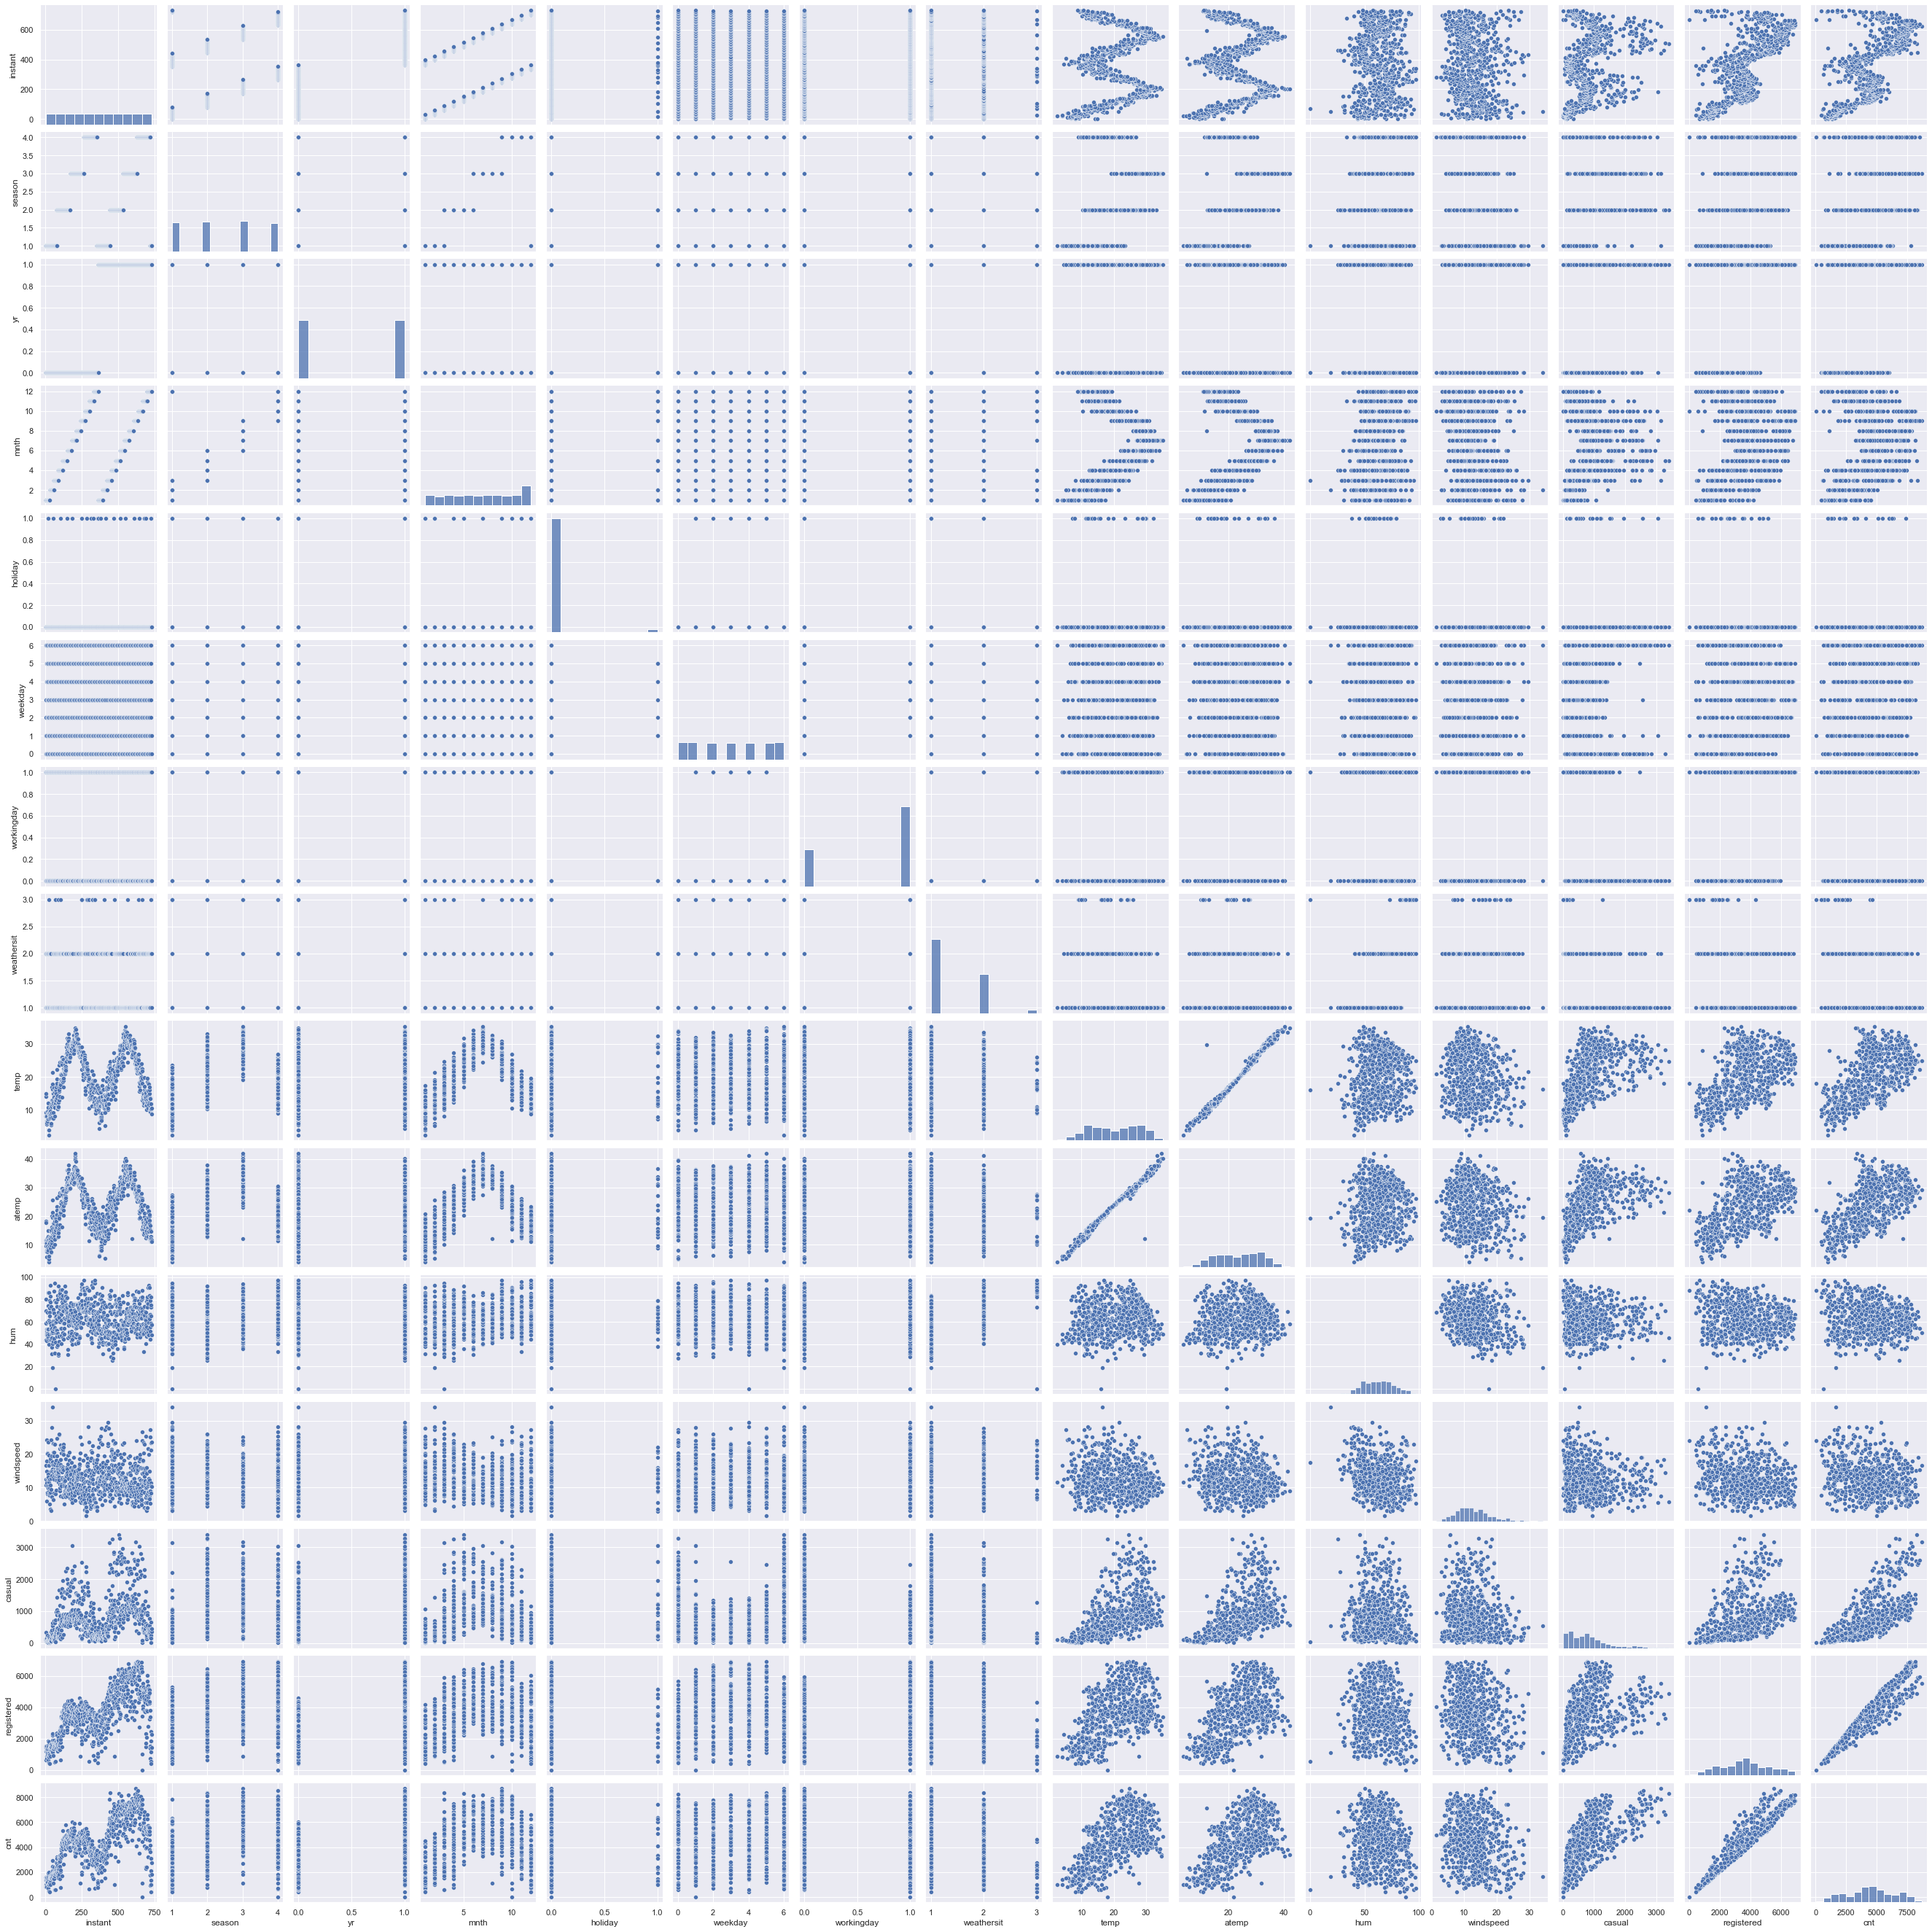

In [192]:
sns.pairplot(bike)
plt.show()

In [193]:
# Possible Values of each column in given dataset
# Season    :  [1 2 3 4]
# Weathersit:  [2 1 3]
# yr        :  [0 1]
# mnth      :  [ 1  2  3  4  5  6  7  8  9 10 11 12]
# holiday   :  [0 1]
# weekday   :  [6 0 1 2 3 4 5]
# workingday:  [0 1]
# temp, hum, windspeed can take any values either numerical or float

## 2(b): Checking outliers in float cloumns

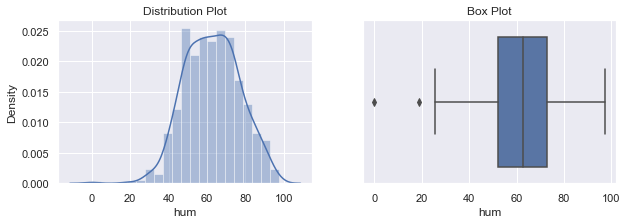

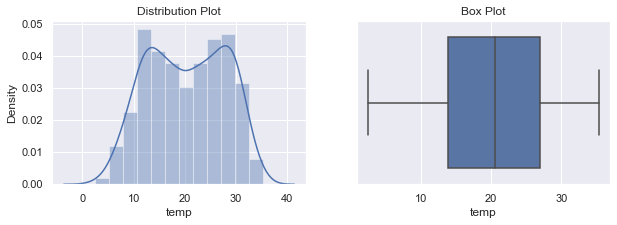

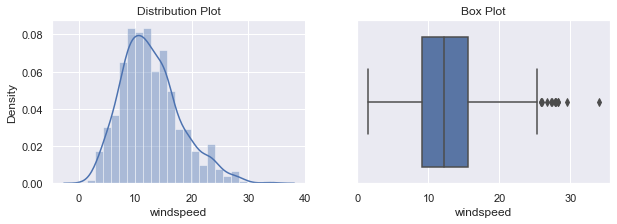

In [194]:
# Checking outliers in float columns (hum, temp, & windspeed) which can takes any values
univariate(df=bike,col='hum')
univariate(df=bike,col='temp')
univariate(df=bike,col='windspeed')

### No major outliear so no need to treat outliers here.

## 2(c): Pairplot for descrete numeric variables

In [195]:
# Since temp, hum, windspeed are continuous variable so draw Pairplot for these over "cnt"

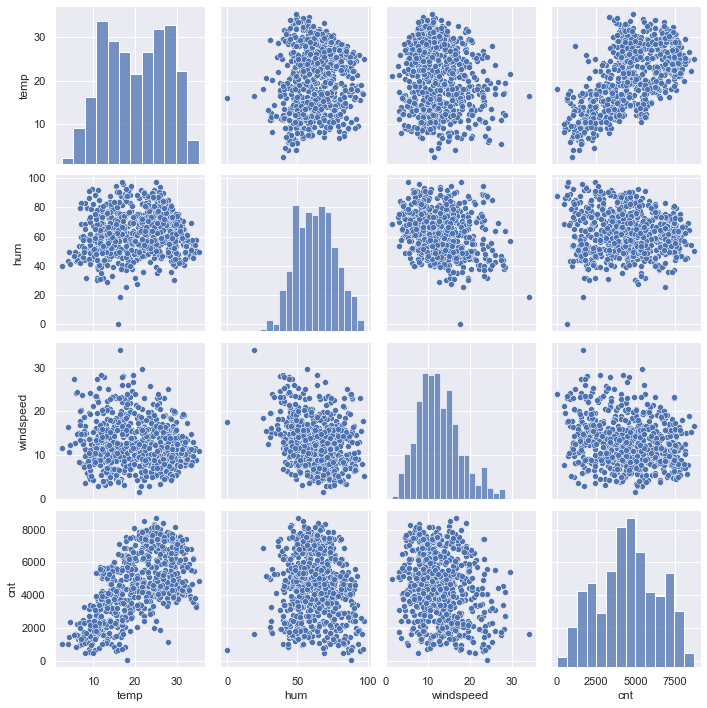

In [197]:
sns.pairplot(bike[['temp','hum','windspeed','cnt']])
plt.show()

#### Interpretation : We can see that there is a positive correaltion between temp and cnt.

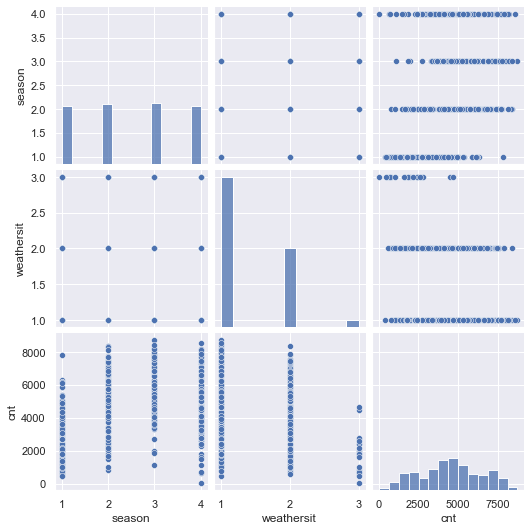

In [198]:
# Tried to draw pairplot for season,weatherlist but not much usefil info so need 
# to convert into Categorical variable.
sns.pairplot(bike[['season','weathersit','cnt']])
plt.show()

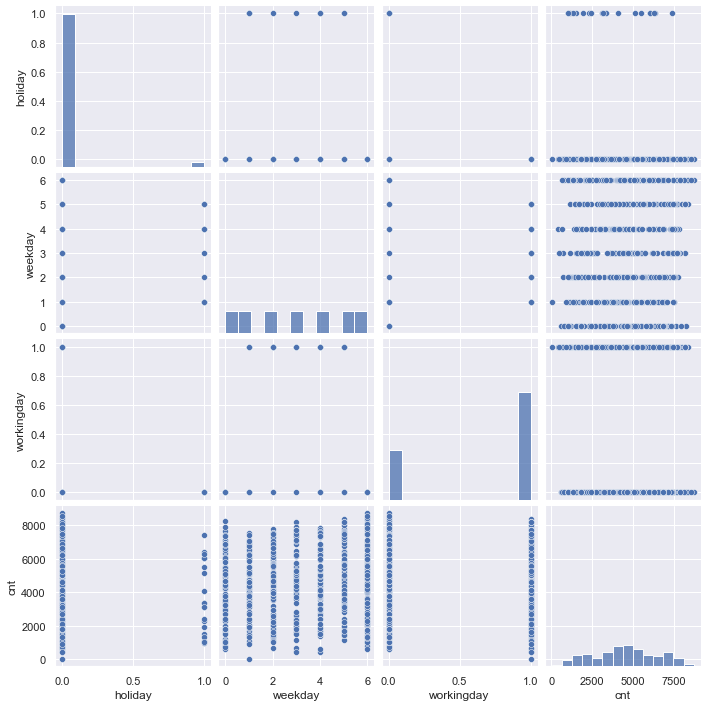

In [199]:
# Tried to draw pairplot for holiday,weekday & workingday but not much usefil info so need 
# to convert into Categorical variable if needed.
sns.pairplot(bike[['holiday','weekday','workingday','cnt']])
plt.show()

## 2(d) Map weathersit,season,mnth & weekday as per data sictionary description 

In [200]:
## 2(d) Convert Descrete Numerical Variable into Categorical Variable to analyse more
#Convert weathersit,season,mnth & weekday as per data sictionary description 
bike['weathersit'] = bike['weathersit'].map({1:'Clear',2:'Cloudy',3:'Snow',4:'Rain'})
bike['season'] = bike['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
bike['mnth']   = bike['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',
                                 8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weekday'] = bike['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',
                                       6:'Sat'})

<AxesSubplot:xlabel='season', ylabel='cnt'>

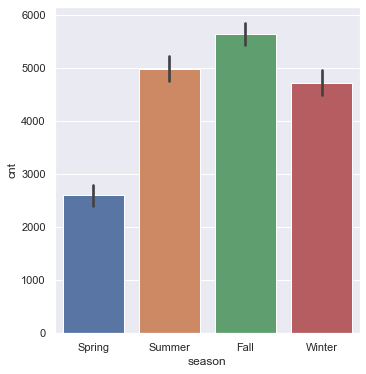

In [201]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.barplot(x = 'season', y = 'cnt', data = bike)

## Observation: In fall season total bookings is higher

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

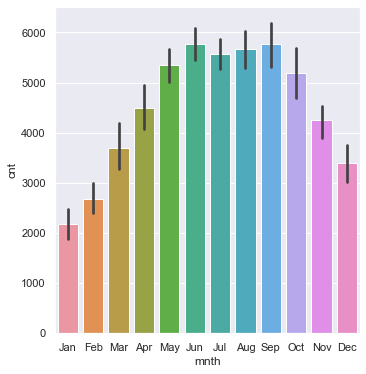

In [202]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.barplot(x = 'mnth', y = 'cnt', data = bike)

## Observation: Total renting is higher from month May to Sep

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

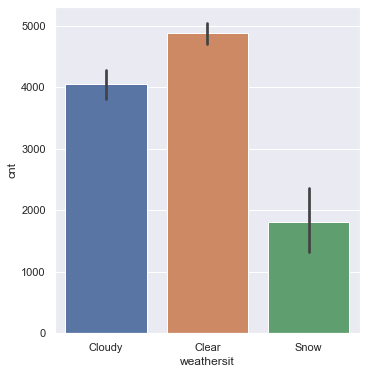

In [203]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.barplot(x = 'weathersit', y = 'cnt', data = bike)

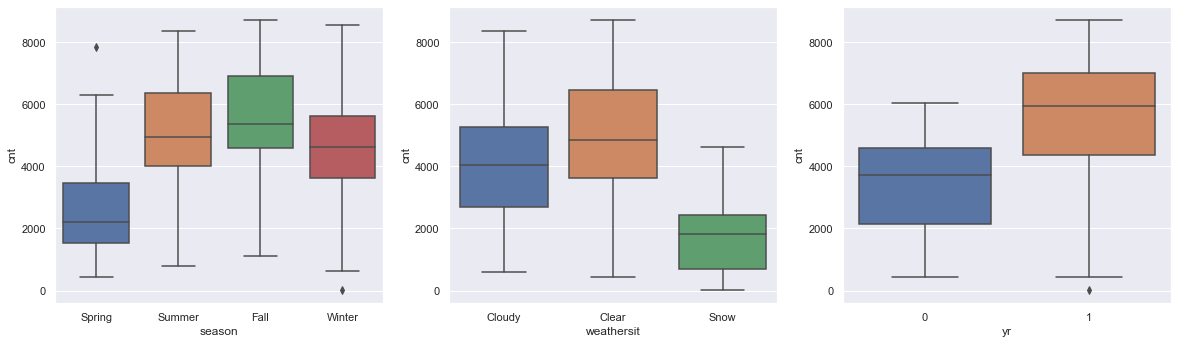

In [204]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `furnishingstatus` with `airconditioning` as the hue.

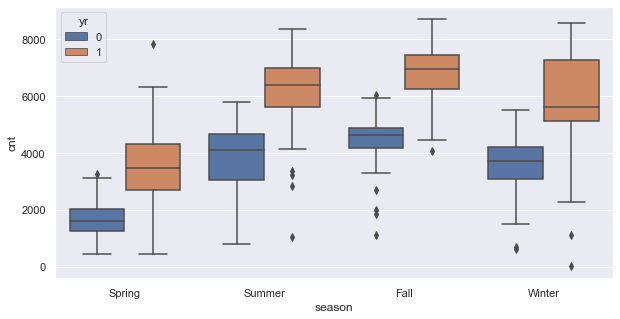

In [205]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'yr', data = bike)
plt.show()

## Observation: When weather is clear then booking is higher

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

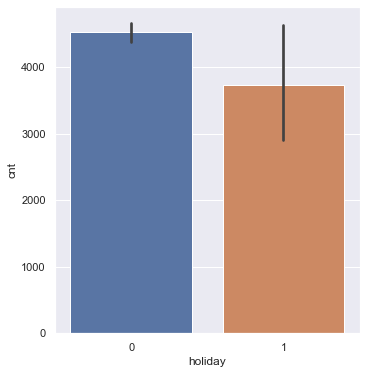

In [206]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.barplot(x = 'holiday', y = 'cnt', data = bike)

## Observation: On Non Holiday total booking is higher than Holiday
## Hence Holiday is good variable for. model building

<AxesSubplot:xlabel='yr', ylabel='cnt'>

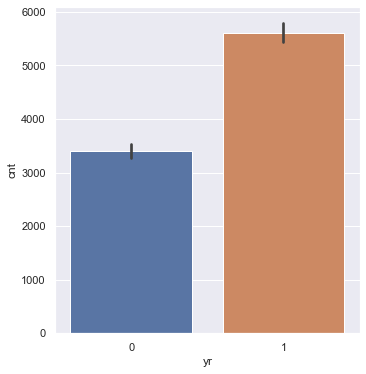

In [207]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.barplot(x = 'yr', y = 'cnt', data = bike)

## Observation: We can see year is also factor for booking so again we must consider yr as important variable for booking

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

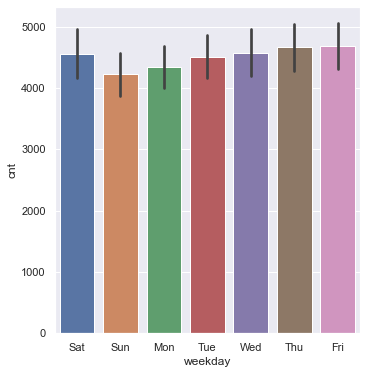

In [208]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.barplot(x = 'weekday', y = 'cnt', data = bike)

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

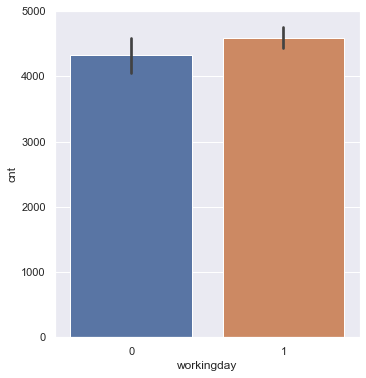

In [209]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.barplot(x = 'workingday', y = 'cnt', data = bike)

## 2(e) Convert Categorical Variable into Dummy Variables

#### Variable 'weathersit' and 'season' has 4 levels so will convert into dummy variables

In [166]:
bike.yr

0      0
1      0
2      0
3      0
4      0
      ..
725    1
726    1
727    1
728    1
729    1
Name: yr, Length: 730, dtype: int64

In [210]:
bike = pd.get_dummies(data=bike, 
                      columns=['season','mnth','weekday','weathersit'],drop_first = True)
                               

In [215]:
# Get the dummy variables for the feature weathersit' and 
# store it in a new variable - 'status'

#bike=pd.get_dummies(data=bike, columns=['season', 'mnth','weekday','weathersit'], 
#                  drop_first = True)
bike=pd.get_dummies(bike[['season', 'mnth','weekday','weathersit']], 
                  drop_first = True)
bike.head()
bike.head()

KeyError: "None of [Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')] are in the [columns]"

In [214]:
print(df.columns)
print(df.shape)

NameError: name 'df' is not defined

## STEP3: Splitting the dataset

In [ ]:
# Splitting the data into Train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=11)

In [ ]:
print(Xtrain.columns)
print(Xtest.columns)
print(ytrain.head)

## STEP4: Applying Scaling to Numerical Variables

In [ ]:
num_cols = ['temp','atemp','hum','windspeed','cnt']

In [ ]:
std = MinMaxScaler()
Xtrain[num_cols] = std.fit_transform(Xtrain[num_cols])
Xtrain

In [ ]:
print(ytrain.shape)
print(ytest.shape)
print(ytrain.head())
ytrain = Xtrain.pop('cnt')
print(ytrain.head())

In [ ]:
#drop dteDay Since dteDay is covered under yr
df = df.drop('dteday',axis = 1)
Xtrain = Xtrain.drop('dteday',axis = 1)

#Drop instant since this is auto-increment number, will not have any significance in model
df = df.drop('instant',axis = 1)
Xtrain = Xtrain.drop('instant',axis = 1)

#Drop instant since this already connected to cnt, will be directly corelated to Cnt
df = df.drop('registered',axis = 1)
Xtrain = Xtrain.drop('registered',axis = 1)

#Drop instant since this already connected to cnt,  will be directly corelated to Cnt
df = df.drop('casual',axis = 1)
Xtrain = Xtrain.drop('casual',axis = 1)

In [ ]:
bike.head()

In [ ]:
bike.describe()

In [ ]:
print(bike.type)

In [ ]:
corrMatrix = df.corr()
plt.figure(figsize = (20, 15))
sns.heatmap(corrMatrix, annot=True)
#sns.set(rc={"figure.figsize":(100, 50)}) #width=20, #height=20
plt.show()

## Observation: Clearly from co-relation matrix temp and atemp are directly corelated so we can safely drop one of them as well as spring, summer, winter is directly coreleated to temp as corelation score is > 0.5



In [ ]:
temp and cnt are highly corelated

You can see a corelation between month and seasons like May is to Summer and Spring is to Feb and Jan



In [ ]:
# Create pairplot of all the variables that are correlated from above matrix, lets' remove non colrelated variables to cnt using model
#sns.pairplot(df)  
sns.pairplot(df,vars=['cnt','holiday','workingday','season_summer','season_spring','season_winter','temp','windspeed'])  
plt.show()

## Clear linear coreleation is visible between cnt and temp

## STEP5: Building model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

Perform RFE to remove features and then follow manual removal using statsmodel Recursive feature elimination.

In [ ]:
print(Xtest.columns)
#ytrain = Xtrain['cnt']
#X= df
#Xtrain = Xtrain.pop('cnt')

In [ ]:
###### Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(Xtrain, ytrain)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(Xtrain, ytrain)



In [ ]:
list(zip(Xtrain.columns,rfe.support_,rfe.ranking_))

In [ ]:
col = Xtrain.columns[rfe.support_]
col

## Building model using statsmodel, for the detailed statistics

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = Xtrain[col]

In [ ]:
print(getStatModelSummary(X_train_rfe,ytrain))
print(calulateVIF(X_train_rfe))

In [ ]:
#lets drop column atemp since it has very high P value i.e. > 0.05 significance level, 
# anyways from correlation matrix we found temp and atemp were correlated
X_train_rfe = X_train_rfe.drop(["atemp"], axis = 1)
print(getStatModelSummary(X_train_rfe,ytrain))
print(calulateVIF(X_train_rfe))

## Observation: There are no p value greater than 0.05 but there are still some columns where VIF is > 5 let's drop those to simplify our model

In [ ]:
#lets drop column hum since it has very VIF i.e. > 5
X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)
print(getStatModelSummary(X_train_rfe,ytrain))
print(calulateVIF(X_train_rfe))

## Observation Adjusted R-square is decreasing which is not good but we can still drop VIF > 5 to simplify the model further but we have already seen temp if correlated to cnt hence let's not drop it.

In [ ]:
X_train_rfe.columns

In [ ]:
print(getStatModelSummary(X_train_rfe,ytrain))
print(calulateVIF(X_train_rfe))
# X_train_rfe = X_train_rfe.drop(["const"], axis = 1)


In [ ]:
# Checking the parameters obtained
lm= getStatModel(X_train_rfe,ytrain)
lm.params


In [ ]:
##ploting the results of temp vs cnt to see how much linear regression model is followed
plt.plot(Xtrain.temp, ytrain, 'o', color='green')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(Xtrain.temp, ytrain, 1)

#use red as color for regression line
plt.plot(Xtrain.temp, m*Xtrain.temp+b, color='red')

### Seems model is prepared as probablity is < 0.05 and VIF are not > 5 (Exception of temp)

## STEP6: Residual Analysis of the train data
Now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
lm.summary()

In [ ]:
#X_train_error =X_train_rfe 
#X_train_error = sm.add_constant(X_train_error)
#lm = sm.OLS(ytrain,X_train_error).fit()   # Running the linear model
#print(X_train_error.shape)
ytrain_pred=getStatModel(X_train_error,ytrain).predict(X_train_error)


In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (10, 10))
sns.distplot((ytrain - ytrain_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label"

## STEP7: Making Predictions

Applying the scaling on the test sets

In [ ]:
Xtest.head()

In [ ]:
#apply scaling on test data
#num_cols = ['temp','atemp','hum','windspeed','cnt']
#std = MinMaxScaler()
Xtest[num_cols] = std.transform(Xtest[num_cols])
Xtest.head()
ytest = Xtest.pop('cnt')

#ytest = Xtest.pop('cnt')


In [ ]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
Xtest_new = Xtest[X_train_rfe.columns]
Xtest_new# Adding a constant variable 
Xtest_new = sm.add_constant(Xtest_new)

In [ ]:
]# Making predictions
ytest_pred = lm.predict(Xtest_new)

## Step 8: Model Evaluation

## Hypothesis Testing
STEP 8: Model Evaluation

Hypothesis Testing :

Hypothesis Testing States that H0:B1=B2=...=Bn=0 H1: at least one Bi!=0

lm model coefficient values

const 0.293426 temp 0.360252 windspeed -0.114046 season_spring -0.096127 season_winter 0.079929 mnth_dec -0.100545 mnth_feb -0.074138 mnth_jan -0.100478 mnth_jul -0.066659 mnth_nov -0.104161 yr_1 0.256542 weekday_Sat 0.028241 weathersit_Cloudy -0.075520 weathersit_Snow -0.264098 dtype: float64


## Observations: From the lm model summary, it is evident that all our coefficients are not equal to zero, which means we REJECT the NULL HYPOTHESIS




In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(ytest,ytest_pred)
fig.suptitle('ytest vs ypred', fontsize=20)              # Plot heading 
plt.xlabel('ytest', fontsize=18)                          # X-label
plt.ylabel('ypred', fontsize=16)  


## Observation:ytest vs ypred plot is quite linear

In [ ]:
from sklearn.metrics import r2_score
print('Train R-Score: ' ,r2_score(ytrain,ytrain_pred))  # R score for train data
print('Test R-Score: ' ,r2_score(ytest, ytest_pred))

r2_score(ytest, ytest_pred)

In [ ]:
X_train_rfe.columns


In [ ]:
lm.params

## Final Equation of Regression Line
The equation of best fitted surface based on model lm: cnt=0.293426 + (0.360252 x temp) + (-0.114046 x windspeed) + (-0.096127 x season_spring) + (0.079929 x season_winter) + (-0.100545 x mnth_dec) + (-0.074138 x mnth_feb) + (-0.100478 x mnth_jan) + (-0.066659 x mnth_jul) + (-0.104161 x mnth_nov) + ( 0.256542 x yr_1) + ( 0.028241 x weekday_Sat) + ( -0.075520 x weathersit_Cloudy) + ( -0.264098 x weathersit_Snow)

## Observation:
Significant variables to predict the demand for shared bikes are 'temp', 'windspeed', 'season_spring--season', 'season_winter--season', 'mnth_dec---month', 'mnth_jul --month', 'mnth_nov --month', 'yr_1---year(2019)', 'weekday_Sat --weekday', 'weathersit_Snow--weathersit','weathersit_CLoudy--weathersit'
